In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx
import utils

In [2]:
from collections import defaultdict
from tqdm import tqdm

In [3]:
CATEGORIES = [
    "wordnet_association_108049401",
    "wordnet_authorization_101138670",
    "wordnet_ban_107255401",
    "wordnet_case_law_106535035",
    "wordnet_civil_liberty_113995662",
    "wordnet_code_of_conduct_105668095",
    "wordnet_common_law_108453722",
    "wordnet_company_108058098",
    "wordnet_contract_106520944",
    "wordnet_cooperative_101100877",
    "wordnet_corporation_108059412",
    "wordnet_court_108329453",
    "wordnet_criminal_record_106490173",
    "wordnet_decree_106539770",
    "wordnet_delegating_101140839",
    "wordnet_directive_107170080",
    "wordnet_exemption_100213903",
    "wordnet_foundation_108406486",
    "wordnet_indebtedness_114490319",
    "wordnet_interdiction_107255299",
    "wordnet_judge_110225219",
    "wordnet_judiciary_108166187",
    "wordnet_law_106532330",
    "wordnet_law_108441203",
    "wordnet_lawyer_110249950",
    "wordnet_legal_code_106667792",
    "wordnet_legal_document_106479665",
    "wordnet_legislation_106535222",
    "wordnet_legislative_act_106564387",
    "wordnet_legislature_108163273",
    "wordnet_liability_114530403",
    "wordnet_liberty_113994456",
    "wordnet_liberty_113996061",
    "wordnet_limited_company_108185211",
    "wordnet_mandate_106556481",
    "wordnet_obligation_106773150",
    "wordnet_party_110402824",
    "wordnet_permission_106689297",
    "wordnet_pleading_106559365",
    "wordnet_prerogative_105178715",
    "wordnet_privilege_105158296",
    "wordnet_privilege_105179567",
    "wordnet_proclamation_101266491",
    "wordnet_prohibition_106542047",
    "wordnet_right_104850341",
    "wordnet_right_105174653",
    "wordnet_right_113341756",
    "wordnet_treaty_106773434",
    "wordnet_written_agreement_106771653",
]

In [4]:
RESOURCE_PREFIX = 'http://yago-knowledge.org/resource/'

In [5]:
def get_subclasses_number(category_name, filter_wikicat=False):
    query = """SELECT DISTINCT (count(distinct ?subCategory) as ?count) WHERE {
        ?subCategory rdfs:subClassOf <%s%s> .
        ?entity rdf:type ?subCategory .""" % (RESOURCE_PREFIX, category_name)
    if filter_wikicat:
        query += 'FILTER (!regex(str(?subCategory), "wikicat"))}'
    else:
        query += '}'
    response = utils.query_sparql(query, utils.YAGO_ENPOINT_URL)
    return response[1][0]

In [104]:
for category in CATEGORIES:
    print category, get_subclasses_number(category), get_subclasses_number(category, True)

wordnet_association_108049401 208 9
wordnet_authorization_101138670 1 1
wordnet_ban_107255401 0 0
wordnet_case_law_106535035 0 0
wordnet_civil_liberty_113995662 1 0
wordnet_code_of_conduct_105668095 1 0
wordnet_common_law_108453722 0 0
wordnet_company_108058098 8411 21
wordnet_contract_106520944 2 1
wordnet_cooperative_101100877 62 0
wordnet_corporation_108059412 52 1
wordnet_court_108329453 166 6
wordnet_criminal_record_106490173 1 0
wordnet_decree_106539770 3 3
wordnet_delegating_101140839 0 0
wordnet_directive_107170080 4 0
wordnet_exemption_100213903 0 0
wordnet_foundation_108406486 1 1
wordnet_indebtedness_114490319 0 0
wordnet_interdiction_107255299 0 0
wordnet_judge_110225219 811 8
wordnet_judiciary_108166187 3 0
wordnet_law_106532330 3 3
wordnet_law_108441203 70 1
wordnet_lawyer_110249950 463 6
wordnet_legal_code_106667792 6 1
wordnet_legal_document_106479665 19 10
wordnet_legislation_106535222 0 0
wordnet_legislative_act_106564387 28 0
wordnet_legislature_108163273 44 2
wordne

In [7]:
def build_graph(subcategories_map, levels):
    graph = networkx.DiGraph()
    assert subcategories_map.keys() == levels.keys()
    graph.add_nodes_from(subcategories_map.keys())
    for category, level in subcategories_map.items():
        for children in subcategories_map[category]:
            assert children in subcategories_map.keys()
            if levels[category] == levels[children] - 1 or levels[category] == levels[children]:
                graph.add_edge(category, children)
            else:
                print 'Error, node pointing to lower level'
    return graph

In [8]:
subcategories = defaultdict(list)
levels = defaultdict(int)
for category in tqdm(CATEGORIES):
    utils.get_subcategories(category, subcategories, levels)

100%|██████████| 49/49 [01:08<00:00,  1.41s/it]


In [23]:
def print_graph(graph):
    networkx.draw_spring(graph, with_labels=False)
    plt.draw()

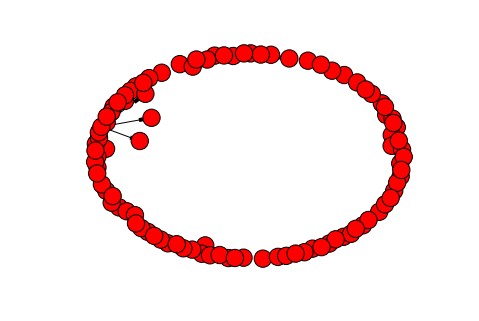

In [24]:
graph = build_graph(subcategories, levels)
print_graph(graph)

In [25]:
subcategories

defaultdict(list,
            {u'wordnet_act_106532095': [],
             u'wordnet_advocate_109775663': [],
             u'wordnet_alcalde_109781804': [],
             u'wordnet_appellate_court_108330106': [],
             'wordnet_association_108049401': [u'wordnet_professional_association_108242675',
              u'wordnet_institute_108407330',
              u'wordnet_club_108227214',
              u'wordnet_chamber_of_commerce_108319061',
              u'wordnet_family_108227916',
              u'wordnet_consortium_108236438',
              u'wordnet_league_108231184',
              u'wordnet_secret_society_108235343',
              u'wordnet_gang_108244062'],
             'wordnet_authorization_101138670': [u'wordnet_certification_101139830'],
             u'wordnet_barrister_109840963': [],
             u'wordnet_bill_106536853': [],
             u'wordnet_broadcasting_company_108002015': [],
             u'wordnet_bull_106726761': [],
             u'wordnet_certification_101139

In [119]:
networkx.__version__

'1.11'